In [1]:
import os
import pickle
from lared_dataset.data_loading.utils import (
    Maker,
    reset_examples_ids,
    write_all_example_videos)

from lared_dataset.constants import (
    processed_pose_path, 
    processed_videos_path,
    processed_accel_path,
    vad_path,
    examples_path)
from lared_dataset.preprocess.pose.plotting import PosePlotter

In [3]:
d = pickle.load(open(os.path.join(processed_accel_path, 'master_data.pkl'), 'rb'))

In [4]:
d.keys()

Index(['Node', 'Frame_No', 'Neighbours', 'x', 'y', 'z'], dtype='object')

In [6]:
d.head()

,Node,Frame_No,Neighbours,x,y,z
0,107,1.0,"[18, 26, 29, 33, 56, 65, 73, 78, 81, 82, 84, 91]","[20, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[-1024, -769, -769, -769, -769, -769, -769, -7...","[14079, 13824, 13824, 13824, 13824, 13824, 138..."
1,107,278.0,"[18, 26, 29, 33, 56, 65, 73, 81, 82, 84, 91, 106]","[20, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[-1024, -769, -769, -769, -769, -769, -769, -7...","[14079, 13824, 13824, 13824, 13824, 13824, 138..."
2,107,279.0,"[18, 26, 29, 33, 56, 65, 78, 81, 82, 84, 91, 106]","[20, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[-1024, -769, -769, -769, -769, -769, -769, -7...","[14079, 13824, 13824, 13824, 13824, 13824, 138..."
3,107,280.0,"[18, 26, 29, 33, 56, 57, 65, 73, 78, 82, 84, 9...","[20, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[-1024, -769, -769, -769, -769, -769, -769, -7...","[14079, 13824, 13824, 13824, 13824, 13824, 138..."
4,107,281.0,"[18, 26, 29, 33, 56, 57, 65, 78, 81, 82, 84, 9...","[20, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[-1024, -769, -769, -769, -769, -769, -769, -7...","[14079, 13824, 13824, 13824, 13824, 13824, 138..."


In [9]:
d['Node'].unique()

array([107, 106,  98,  91,  89,  85,  84,  82,  81,  80,  79,  78,  76,
        75,  73,  68,  65,  64,  62,  57,  56,  55,  54,  52,  50,  49,
        46,  44,  43,  34,  33,  32,  30,  29,  27,  26,  25,  24,  23,
        22,  21,  18,  16,  14,  13,  12,   9,   7,   5,   4,   3,   2])

In [2]:
def make_all_examples():
    examples = []
    for cam in [2,3]:
        tracks_path = os.path.join(processed_pose_path, 'tracks', f'cam{cam}_final.pkl')

        accel_path = os.path.join(processed_accel_path, 'subj_accel_interp.pkl')
        maker = Maker(tracks_path, accel_path, vad_path)
        examples += maker.make_examples(cam=cam)
    
    return examples

In [3]:
def write_examples(examples):
    out_path = os.path.join(processed_videos_path, 'examples')
    reset_examples_ids(examples)
    write_all_example_videos(examples, out_path)

In [4]:
examples = make_all_examples()

In [5]:
len(examples)

23085

In [6]:
plotter = PosePlotter()

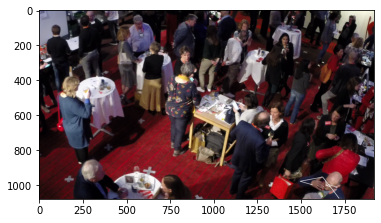

In [7]:
plotter.plot_first_frame(examples[18000])

In [8]:
examples[0]

{'id': 0,
 'pid': 24,
 'cam': 2,
 'ini': 50949,
 'hash': '292e6d9f73c5ec4735240d932dc3c4f4',
 'ini_time': 1700.0,
 'end_time': 1703.003003003003,
 'poses': array([[  0.      ,   0.      ,   0.      , ..., 412.534   , 291.992   ,
           0.640301],
        [  0.      ,   0.      ,   0.      , ..., 412.524   , 291.948   ,
           0.563886],
        [  0.      ,   0.      ,   0.      , ..., 412.505   , 291.94    ,
           0.531274],
        ...,
        [  0.      ,   0.      ,   0.      , ..., 386.026   , 321.304   ,
           0.81273 ],
        [  0.      ,   0.      ,   0.      , ..., 385.963   , 321.289   ,
           0.803338],
        [  0.      ,   0.      ,   0.      , ..., 386.013   , 318.508   ,
           0.814634]], dtype=float32),
 'track_id': 0,
 'track_ini': 0,
 'track_fin': 90}

In [9]:
examples[1]

{'id': 1,
 'pid': 24,
 'cam': 2,
 'ini': 51039,
 'hash': '188ce2fa443c714fc8320ff9ddd0fa68',
 'ini_time': 1703.003003003003,
 'end_time': 1706.0060060060061,
 'poses': array([[  0.      ,   0.      ,   0.      , ..., 385.976   , 318.514   ,
           0.812263],
        [  0.      ,   0.      ,   0.      , ..., 385.948   , 321.342   ,
           0.792296],
        [  0.      ,   0.      ,   0.      , ..., 385.931   , 321.318   ,
           0.802659],
        ...,
        [  0.      ,   0.      ,   0.      , ..., 406.557   , 312.514   ,
           0.787794],
        [  0.      ,   0.      ,   0.      , ..., 406.595   , 312.492   ,
           0.78072 ],
        [  0.      ,   0.      ,   0.      , ..., 406.628   , 312.459   ,
           0.771563]], dtype=float32),
 'track_id': 0,
 'track_ini': 90,
 'track_fin': 180}

In [10]:
write_examples(examples)

100%|██████████| 23085/23085 [1:29:22<00:00,  4.31it/s]


In [11]:
pickle.dump(examples, open(examples_path, 'wb'))